In [2]:
library(dplyr)
library(ggplot2)

# Variable Space and Subject Space

## 1.Variable Space

In [56]:
X <- c(1,1,3,3,4,4,5,6,6,7)
Y <- c(4,7,9,12,11,12,17,13,18,17)
df <- data.frame(X,Y)
glimpse(df)

Rows: 10
Columns: 2
$ X <dbl> 1, 1, 3, 3, 4, 4, 5, 6, 6, 7
$ Y <dbl> 4, 7, 9, 12, 11, 12, 17, 13, 18, 17


In [57]:
df

X,Y
<dbl>,<dbl>
1,4
1,7
3,9
3,12
4,11
4,12
5,17
6,13
6,18


In [36]:
summary(df)

       X              Y       
 Min.   :1.00   Min.   : 4.0  
 1st Qu.:3.00   1st Qu.: 9.5  
 Median :4.00   Median :12.0  
 Mean   :4.00   Mean   :12.0  
 3rd Qu.:5.75   3rd Qu.:16.0  
 Max.   :7.00   Max.   :18.0  

`geom_smooth()` using formula 'y ~ x'



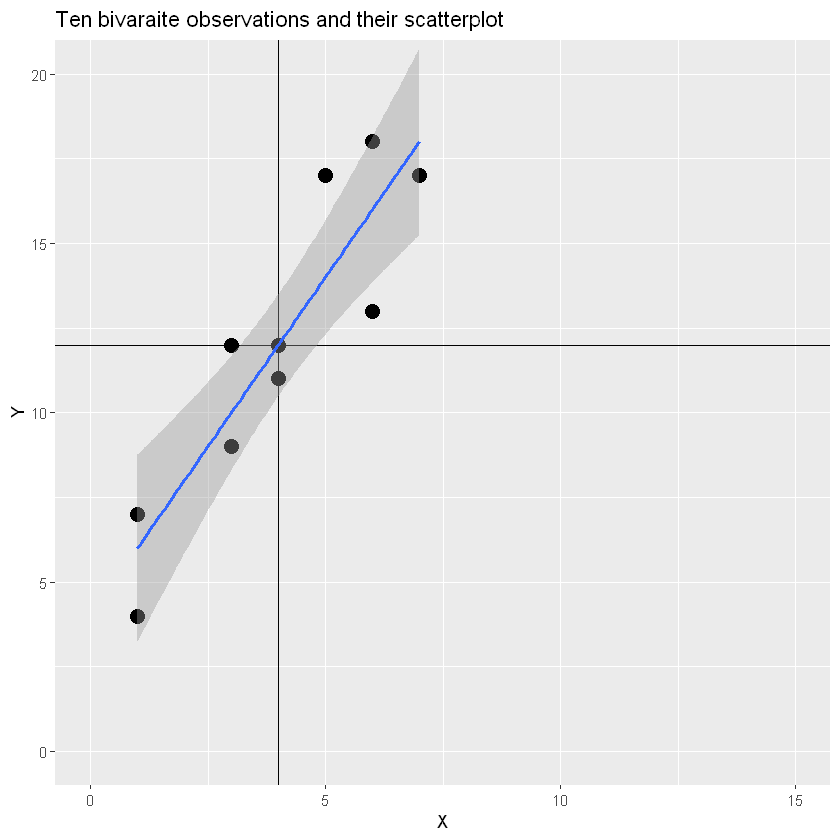

In [35]:
ggplot(data=df,mapping=aes(x=X,y=Y)) +
    geom_point(size=4) +
    geom_vline(aes(xintercept=mean(X))) +
    geom_hline(aes(yintercept=mean(Y))) +
    geom_smooth(method=lm) +
    coord_cartesian(xlim=c(0,15),ylim=c(0,20)) +
    labs(title='Ten bivaraite observations and their scatterplot')

### Observations from scatterplot 

* Points do not cluster around the origin rather around (4,12) => the means are nonzero.
* Points are more spread around the Y axis than along the X axis => Var(Y) > Var(X)
* High values on one variable correspond closelywith high scores on the other variable => substantial association between the variables
* Connection between the variables does not bend and can be roughly represented by a straight line

In [45]:
centering <- df %>% transmute(
    x=X-mean(X),
    y=Y-mean(Y)
)
glimpse(centering)

Rows: 10
Columns: 2
$ x <dbl> -3, -3, -1, -1, 0, 0, 1, 2, 2, 3
$ y <dbl> -8, -5, -3, 0, -1, 0, 5, 1, 6, 5


In [52]:
centering

x,y
<dbl>,<dbl>
-3,-8
-3,-5
-1,-3
-1,0
0,-1
0,0
1,5
2,1
2,6


`geom_smooth()` using formula 'y ~ x'



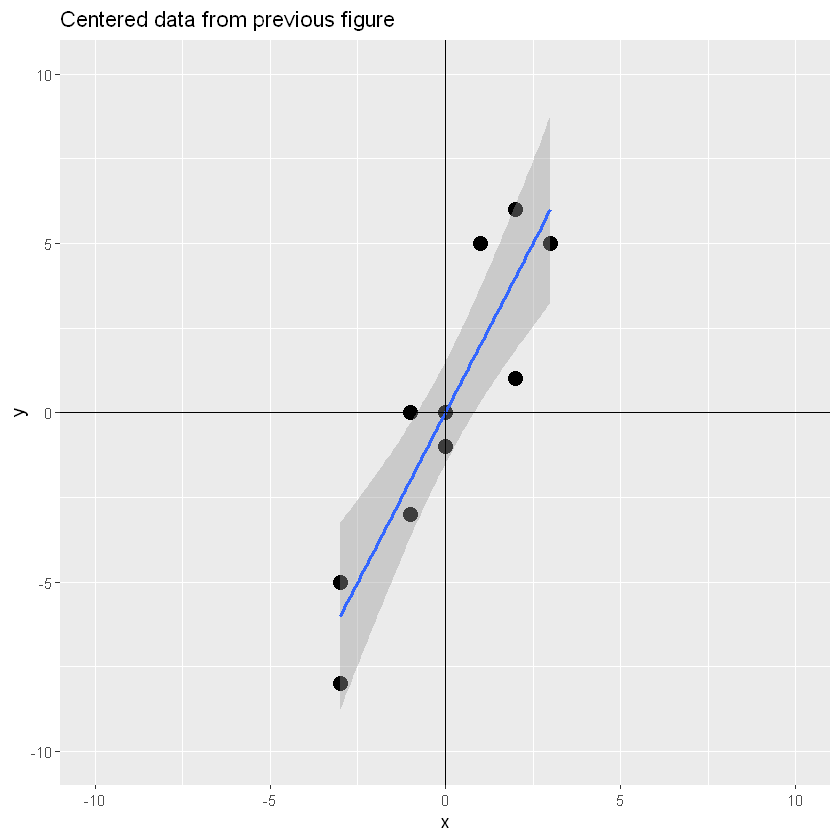

In [49]:
ggplot(data=centering,mapping=aes(x,y)) +
    geom_point(size=4) +
    geom_smooth(method=lm) +
    geom_vline(aes(xintercept=mean(x))) +
    geom_hline(aes(yintercept=mean(y))) +
    coord_cartesian(xlim=c(-10,10),ylim=c(-10,10)) +
    labs(title='Centered data from previous figure')

### The problem with scatterplots

* It clearly shows a pattern of individual observations, but this very characteristic of the scatterplot that makes it useful also limits it
* The scatterplot places emphasis on the observations not on the variables as general entities
* **When one wants to talk about variables, another type of graph is used and gives a clearer picture.**

## 2.Subject Space

Subject space revolves around the idea of ploting our variables (in this case X and Y) as vectors in the n-dimensional space defined by our observations as axis (in this case we have 10 subjects so 10 dimensional space).


This seems weird at first, how the hell am i supposed to imagine or graph a 10-dim space? well the answer is that **you don't have to**.


You can just imagine an origin point O(0,0,...0) and 2 points X and Y which are -surprise- vectors.


If the vectors are linearly independent, they would form a plane or 2d space in 10d space, and that's where the fun begins.


The correlation between the variables X and Y is just the cosine of the angle theta between the two vectors, and the length of vectors reflects the variability in our data

In [76]:
# Calculating the angle between the 2 vectors X and Y in subject space

In [77]:
r <- cor(df$X,df$Y)
cat(r)

0.9039935

In [78]:
rad = acos(r)
deg = 180*rad/pi
cat(rad,deg)

0.4417766 25.31193

Pearson's correlation coefficient is 0.904 which means our 2 variables have a strong association. Does the geometric approach says the same thing?


Well using a simple calculation we can see that the angle theta between the 2 vectors is roughly 26 degrees, and that's sufficient evidence.